In [14]:
import xgboost as xgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [15]:
X = datasets.fetch_covtype().data[:3000]
y = datasets.fetch_covtype().target[:3000]
X_1, X_test, y_1, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_va, y_train, y_va = train_test_split(X_1, y_1)

print(X_train.shape, y_train.shape)
print(np.unique(y_train))  # 7分类任务

(2025, 54) (2025,)
[1 2 3 4 5 6 7]


In [16]:
enc = OrdinalEncoder()
y_train_enc = enc.fit_transform(y_train.reshape(-1, 1))
y_test_enc = enc.transform(y_test.reshape(-1, 1))
y_va_enc = enc.fit_transform(y_va.reshape(-1, 1))
print(np.unique(y_train_enc))
print(y_train_enc.shape)

[0. 1. 2. 3. 4. 5. 6.]
(2025, 1)


In [17]:
# label.shape = (num_sample, 1)
train_dataset = xgb.DMatrix(data=X_train, label=y_train_enc)
val_dataset = xgb.DMatrix(data=X_va, label=y_va_enc)
test_dataset = xgb.DMatrix(data=X_test)

In [18]:
params = {'objective': 'multi:softprob',
          "eval_metric": 'mlogloss',
           "verbosity": 0,
          'num_class': 7}
eval_set = [(train_dataset, "train_"), (val_dataset, "val_")]
evals_result = {}  # 储存评估指标(内置和自定义)结果

In [19]:
from sklearn.metrics import log_loss


def my_xgb_loss(y_pred, y_true):
    """xgboost自定义验证数据集损失函数格式"""
    loss = log_loss(y_true.get_label(), y_pred)
    return 'MY_GBM_LOSS', loss

In [20]:
model = xgb.train(params=params,
                  dtrain=train_dataset,
                  # num_boost_round (int) – Number of boosting iterations.
                  # 默认num_boost_round=10
                  num_boost_round=200,
                  # List of validation sets for which metrics will evaluated during training.
                  evals=eval_set,
                  early_stopping_rounds=100,
                  # verbose_eval (bool or int) – Requires at least one item in evals.
                  # If verbose_eval is True then the evaluation metric on the validation set is printed at each boosting stage.
                  # If verbose_eval is an integer then the evaluation metric on the validation set is printed at every given verbose_eval boosting stage.
                  # The last boosting stage / the boosting stage found by using
                  verbose_eval=20,  # 默认verbose_eval=True
                  evals_result=evals_result,
                  feval=my_xgb_loss,
                  )

[0]	train_-mlogloss:1.35416	train_-MY_GBM_LOSS:1.25412	val_-mlogloss:1.41862	val_-MY_GBM_LOSS:1.33083
[20]	train_-mlogloss:0.16759	train_-MY_GBM_LOSS:0.40059	val_-mlogloss:0.47117	val_-MY_GBM_LOSS:1.56360
[40]	train_-mlogloss:0.07846	train_-MY_GBM_LOSS:0.32071	val_-mlogloss:0.45198	val_-MY_GBM_LOSS:1.71131
[60]	train_-mlogloss:0.04045	train_-MY_GBM_LOSS:0.25346	val_-mlogloss:0.46172	val_-MY_GBM_LOSS:2.14558
[80]	train_-mlogloss:0.02351	train_-MY_GBM_LOSS:0.20664	val_-mlogloss:0.48040	val_-MY_GBM_LOSS:2.37065
[100]	train_-mlogloss:0.01586	train_-MY_GBM_LOSS:0.17894	val_-mlogloss:0.49891	val_-MY_GBM_LOSS:2.46565
[102]	train_-mlogloss:0.01526	train_-MY_GBM_LOSS:0.17592	val_-mlogloss:0.50052	val_-MY_GBM_LOSS:2.46295


In [21]:
# 预测结果为概率向量(多分类)
# test_dataset:The dmatrix storing the input
model.predict(test_dataset)

array([[1.2033793e-01, 3.1307685e-01, 1.9925494e-04, ..., 5.6290388e-01,
        1.7830437e-04, 2.9256379e-03],
       [2.4107078e-03, 2.2499902e-02, 1.8942513e-01, ..., 1.4414597e-02,
        6.8409514e-01, 1.1307647e-03],
       [9.0186119e-01, 9.7052738e-02, 1.1470662e-04, ..., 2.2884806e-04,
        5.6450859e-05, 5.5799709e-04],
       ...,
       [9.1791637e-03, 9.6995407e-01, 2.4844026e-03, ..., 1.4893137e-02,
        2.4792382e-03, 6.8368652e-04],
       [9.6011005e-05, 1.6109869e-03, 2.3636527e-05, ..., 9.9812812e-01,
        9.2497510e-05, 3.2270811e-05],
       [3.9146122e-02, 9.6006542e-01, 1.3205495e-04, ..., 1.0020251e-04,
        3.8884167e-04, 8.7464636e-05]], dtype=float32)

In [22]:
evals_result

{'train_': OrderedDict([('mlogloss',
               [1.354157,
                1.054967,
                0.858097,
                0.719173,
                0.615884,
                0.534199,
                0.474049,
                0.424608,
                0.383575,
                0.350375,
                0.319543,
                0.294459,
                0.276122,
                0.256138,
                0.237375,
                0.224076,
                0.211105,
                0.196657,
                0.184529,
                0.176245,
                0.167589,
                0.16047,
                0.154577,
                0.150315,
                0.144626,
                0.138287,
                0.132949,
                0.129196,
                0.125059,
                0.121459,
                0.115023,
                0.109788,
                0.104863,
                0.101189,
                0.096712,
                0.093935,
                0.09054,
   

In [23]:
evals_result['train_'].keys()

odict_keys(['mlogloss', 'MY_GBM_LOSS'])

In [24]:
# 特征的相对重要性
xgb.plot_importance(model)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

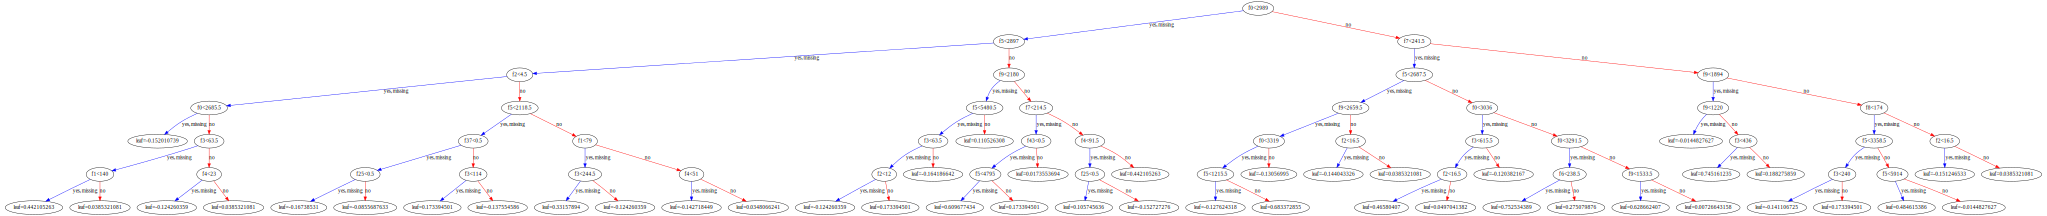

In [25]:
# 可视化lgb分割过程
img = xgb.to_graphviz(model)
img

In [26]:
# 数据类型graphviz.files.Source
type(img)




graphviz.files.Source